<h1>Phenograph clustering</h1>

This notebook is a continuation of the previous notebook, but applying the phenograph algorithm as opposed to the FlowSOM algorithm.

In [2]:
from cytopy.data.project import Project
from cytopy.data.setup import global_init
from cytopy.flow.clustering import phenograph_clustering, Clustering, phenograph_metaclustering
global_init("cytopy_db")

In [3]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import logging
sns.set(style="white", font_scale=1.3)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [4]:
project = Project.objects(project_id="Peritonitis").get()
project.list_experiments()

['PBMC T cells', 'Corrected PBMC T cells']

In [5]:
exp = project.load_experiment("Corrected PBMC T cells")

In [6]:
features = ['FSC-A', 'FSC-H', 'SSC-A', 'SSC-W', 'CXCR3', 'CD161', 'CCR7', 'Va7-2',
            'CD8', 'Vd2', 'CD45RA', 'PanGD', 'CD4', 'CD27']

In [8]:
clustering = Clustering(experiment=exp,
                        features=features,
                        sample_ids=[x for x in exp.list_samples() if x != "Training Data"],
                        root_population="root",
                        transform="logicle",
                        verbose=True,
                        population_prefix="Phenograph")

Loading single cell data...


  0%|          | 0/14 [00:00<?, ?it/s]

/home/ross/CytoPy/CytoPy/data/experiment.py:1203: UserWarning: Corrected_165-09 is not associated to a Subject
  warn(f"{filegroup.primary_id} is not associated to a Subject")
/home/ross/CytoPy/CytoPy/data/experiment.py:1203: UserWarning: Corrected_175-09 is not associated to a Subject
  warn(f"{filegroup.primary_id} is not associated to a Subject")
/home/ross/CytoPy/CytoPy/data/experiment.py:1203: UserWarning: Corrected_210-14 is not associated to a Subject
  warn(f"{filegroup.primary_id} is not associated to a Subject")
/home/ross/CytoPy/CytoPy/data/experiment.py:1203: UserWarning: Corrected_251-07 is not associated to a Subject
  warn(f"{filegroup.primary_id} is not associated to a Subject")
/home/ross/CytoPy/CytoPy/data/experiment.py:1203: UserWarning: Corrected_254-05 is not associated to a Subject
  warn(f"{filegroup.primary_id} is not associated to a Subject")
/home/ross/CytoPy/CytoPy/data/experiment.py:1203: UserWarning: Corrected_255-04 is not associated to a Subject
  warn(f"

Ready to cluster!


/home/ross/CytoPy/CytoPy/data/experiment.py:1203: UserWarning: Corrected_318-01 is not associated to a Subject
  warn(f"{filegroup.primary_id} is not associated to a Subject")


In [22]:
clustering.cluster(phenograph_clustering,
                   k=10,
                   print_performance_metrics=False)

----- Clustering Corrected_165-09 -----
Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.4150679111480713 seconds
Jaccard graph constructed in 0.17928791046142578 seconds
Wrote graph to binary file in 0.030228853225708008 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.877808
After 18 runs, maximum modularity is Q = 0.879059
Louvain completed 38 runs in 2.088270902633667 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 2.7846415042877197 seconds
-----------------------------


----- Clustering Corrected_175-09 -----
Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.467212438583374 seconds
Jaccard graph constructed in 0.1734621524810791 seconds
Wrote graph to binary file in 0.03618168830871582 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.88735
After 6 runs, maximum modularity is Q

Louvain completed 24 runs in 1.5512912273406982 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 2.236212730407715 seconds
-----------------------------




<h2>Meta clustering</h2>

In [23]:
clustering.meta_cluster(phenograph_metaclustering,
                        summary_method="median",
                        k=10)

----- Phenograph meta-clustering ------
...summarising clusters
...clustering the clusters
Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.005223989486694336 seconds
Jaccard graph constructed in 0.0733335018157959 seconds
Wrote graph to binary file in 0.0020236968994140625 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.841026
After 3 runs, maximum modularity is Q = 0.84689
After 4 runs, maximum modularity is Q = 0.849469
Louvain completed 24 runs in 0.5109872817993164 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.6578054428100586 seconds
Clustering performance...
Silhouette coefficient: 0.23673613951105063
Calinski-Harabasz index: 92.24061248908
Davies-Bouldin index: 1.4066213875174147
...assigning meta-labels
------ Complete ------


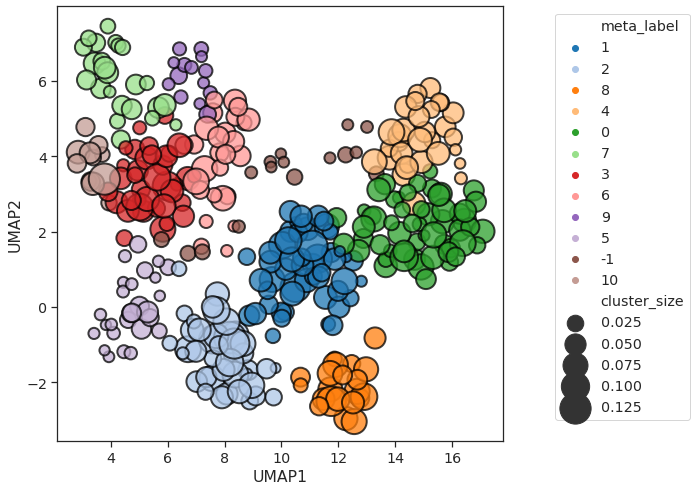

In [24]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 50,
                                                    "min_dist": 1})
plt.savefig("figures/Phenograph/meta_umap.png", dpi=300, facecolor="white", bbox_inches="tight")

In [25]:
clustering.data["subject"] = clustering.data["sample_id"].apply(lambda x: x.replace("Corrected_", ""))

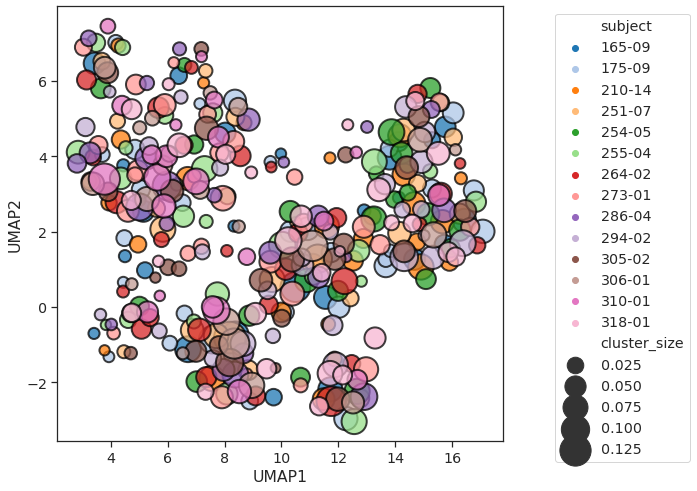

In [26]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 50,
                                                    "min_dist": 1},
                              colour_label="subject")
plt.savefig("figures/Phenograph/meta_umap_subject.png", dpi=300, facecolor="white", bbox_inches="tight")

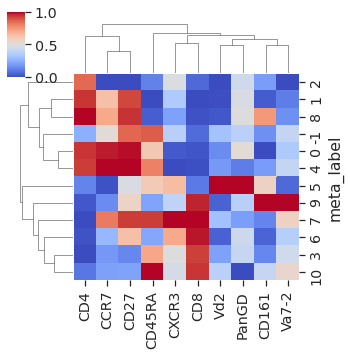

In [27]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(5, 5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)

In [28]:
clustering.rename_meta_clusters({5: "Vδ2+ γδ T cells",
                                 9:"MAIT cells",
                                 2: "CD4+ T cells (1)",
                                 1: "CD4+ T cells (2)",
                                 8: "CD4+ T cells (3)",
                                 0: "CD4+ T cells (4)",
                                 4: "CD4+ T cells (5)",
                                 7: "CD8+ T cells (1)",
                                 6: "CD8+ T cells (2)",
                                 3: "CD8+ T cells (3)",
                                 10:"CD8+ T cells (3)",
                                 -1:"CD4- CD8- T cells"})

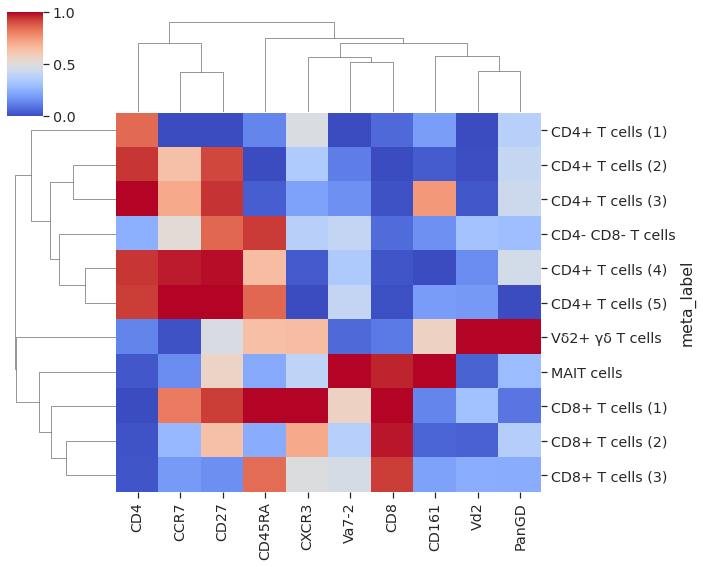

In [29]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(10, 8),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)
plt.savefig("figures/Phenograph/meta_heatmap.png", dpi=300, facecolor="white", bbox_inches="tight")

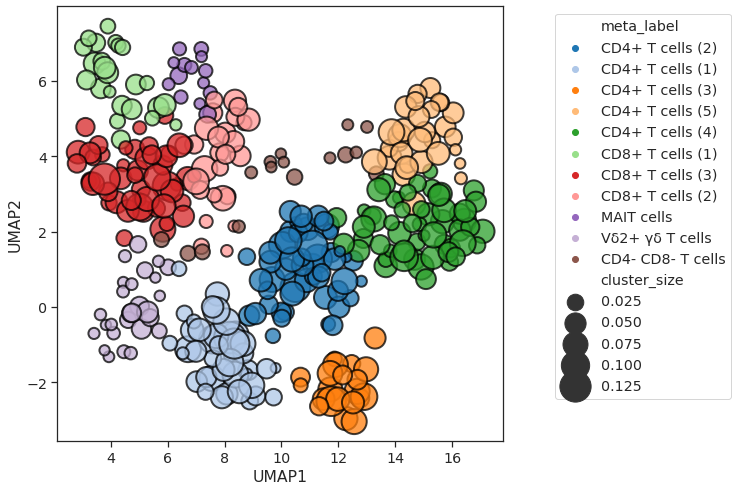

In [30]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 50,
                                                    "min_dist": 1})
plt.savefig("figures/Phenograph/meta_umap.png", dpi=300, facecolor="white", bbox_inches="tight")

In [31]:
clustering.save()

  0%|          | 0/14 [00:00<?, ?it/s]

<h2>Comparison to manual gating</h2>

In [32]:
auto_results = exp.population_statistics()
manual = pd.read_csv("manual_gates1.csv")

In [33]:
def auto_vs_manual(auto_results: pd.DataFrame,
                   manual: pd.DataFrame,
                   auto_population_name: str,
                   manual_population_name: str):
    sample_n = (auto_results[auto_results.population_name.str.contains("Phenograph")]
                .groupby("sample_id")
                .n.sum())
    sample_n.name = "sample_n"
    auto = auto_results[auto_results.population_name.str.contains(auto_population_name)].copy()
    auto = auto.groupby(["sample_id"]).n.sum()
    auto = sample_n.reset_index().merge(auto.reset_index(), on="sample_id")
    auto["Auto"] = auto["n"]/auto["sample_n"]
    auto["sample_id"] = auto["sample_id"].apply(lambda x: x.replace("Corrected_", ""))
    manual["Manual"] = manual[manual_population_name]/manual["Live single CD3+ cells"]
    stats = manual.merge(auto, on="sample_id", how="outer")
    stats.fillna(0, inplace=True)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.scatter(stats.Auto.values*100,
               stats.Manual.values*100,
               edgecolor="black",
               color="#4e7abf",
               s=120,
               linewidth=2,
               zorder=1)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle="--", color="black", zorder=0)
    axis_lower_lim = np.min([np.min(ax.get_xlim()),
                             np.min(ax.get_ylim())])
    axis_upper_lim = np.max([np.max(ax.get_xlim()),
                             np.max(ax.get_ylim())])
    ax.set_xlim((axis_lower_lim, axis_upper_lim))
    ax.set_ylim((axis_lower_lim, axis_upper_lim))
    ax.locator_params(axis='y', nbins=6)
    ax.locator_params(axis='x', nbins=6)
    ax.set_xlabel("Autonomous gates")
    ax.set_ylabel("Manual gates")
    return ax, stats

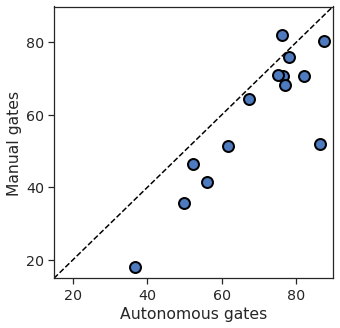

In [34]:
ax, stats = auto_vs_manual(auto_results, manual, "Phenograph_CD4+", "CD4+ CD8- T cells")
plt.savefig("figures/Phenograph/cd4.png", facecolor="white", bbox_inches="tight", dpi=300)
plt.show()

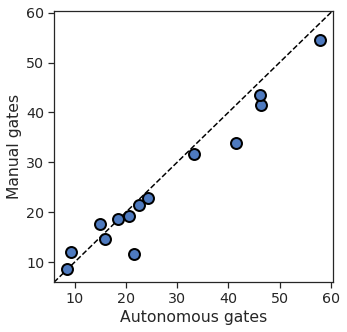

In [35]:
ax, stats = auto_vs_manual(auto_results, manual, "Phenograph_CD8+", "CD4- CD8+ T cells")
plt.savefig("figures/Phenograph/cd8.png", facecolor="white", bbox_inches="tight", dpi=300)
plt.show()

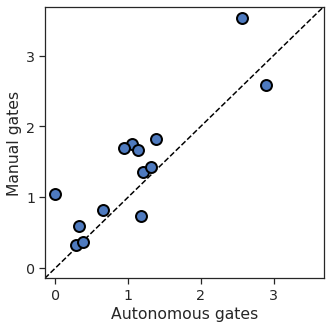

In [36]:
ax, stats = auto_vs_manual(auto_results, manual, "Phenograph_MAIT", "MAIT cells")
plt.savefig("figures/Phenograph/MAITs.png", facecolor="white", bbox_inches="tight", dpi=300)
plt.show()

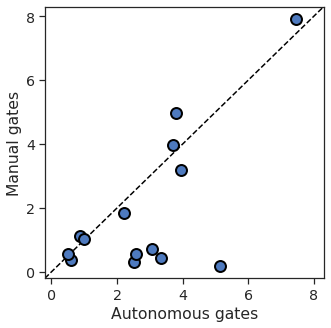

In [37]:
ax, stats = auto_vs_manual(auto_results, manual, "Phenograph_Vδ2+", "Vd2+ GDTs")
plt.savefig("figures/Phenograph/GDTs.png", facecolor="white", bbox_inches="tight", dpi=300)
plt.show()